In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] #设置字体，设置了字体后，负号会变成乱码
plt.rcParams['axes.unicode_minus'] = False #让负号的乱码正常显示

data = pd.read_csv('data/Global GDP.csv')
gdp = data.to_numpy()
gdp = gdp[gdp[:, 3] == 'MLN_USD']
gdp = gdp[gdp[:, 5] >= 2014]
data

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,MLN_USD,A,1960,25034.740000,NaN
1,AUS,GDP,TOT,MLN_USD,A,1961,25326.382000,NaN
2,AUS,GDP,TOT,MLN_USD,A,1962,27913.206000,NaN
3,AUS,GDP,TOT,MLN_USD,A,1963,30385.723000,NaN
4,AUS,GDP,TOT,MLN_USD,A,1964,32694.467000,NaN
...,...,...,...,...,...,...,...,...
4806,EU27_2020,GDP,TOT,USD_CAP,A,2016,39217.911849,NaN
4807,EU27_2020,GDP,TOT,USD_CAP,A,2017,40777.555180,NaN
4808,EU27_2020,GDP,TOT,USD_CAP,A,2018,42109.670532,NaN
4809,EU27_2020,GDP,TOT,USD_CAP,A,2019,43425.900961,NaN


In [60]:
def calculate_growth_rate(x):
    if len(x) < 2:
        return
    l = []
    for i in range(1, len(x)):
        l.append((x[i] - x[i-1]) / x[i-1] * 100)
    return l

UnitedStates = calculate_growth_rate(gdp[gdp[:, 0]=='USA'][:, 6])
China = calculate_growth_rate(gdp[gdp[:, 0]=='CHN'][:, 6])
Japan = calculate_growth_rate(gdp[gdp[:, 0]=='JPN'][:, 6])
Germany = calculate_growth_rate(gdp[gdp[:, 0]=='DEU'][:, 6])
Britain = calculate_growth_rate(gdp[gdp[:, 0]=='GBR'][:, 6])
India = calculate_growth_rate([2.04, 2.1, 2.29, 2.65, 2.7, 2.83, 2.67])

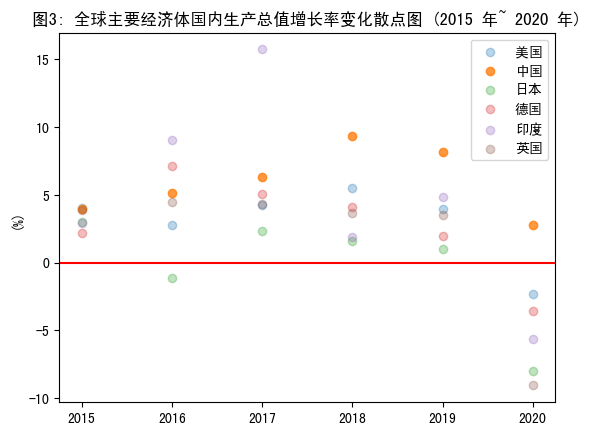

In [61]:
label_title = ["2015", "2016", "2017", "2018", "2019", "2020"]

plt.scatter(label_title, UnitedStates, label='美国', alpha=0.3)
plt.scatter(label_title, China, label='中国', alpha=0.8)
plt.scatter(label_title, Japan, label='日本', alpha=0.3)
plt.scatter(label_title, Germany, label='德国', alpha=0.3)
plt.scatter(label_title, India, label='印度', alpha=0.3)
plt.scatter(label_title, Britain, label='英国', alpha=0.3)
plt.legend(loc='upper right')
plt.title('图3: 全球主要经济体国内生产总值增长率变化散点图 (2015 年~ 2020 年)')
plt.ylabel('(%)')
plt.axhline(0, color='r')